## Homework 5

### 1 Chapter 9
This problem involves hyperplanes in two dimensions.

(a) Sketch the hyperplane 1 + 3X1 − X2 = 0. Indicate the set of
points for which 1 + 3X1 − X2 > 0, as well as the set of points
for which 1 + 3X1 − X2 < 0.

(b) On the same plot, sketch the hyperplane −2 + X1 + 2X2 = 0.
Indicate the set of points for which −2+ X1 +2X2 > 0, as well
as the set of points for which −2+ X1 + 2X2 < 0.

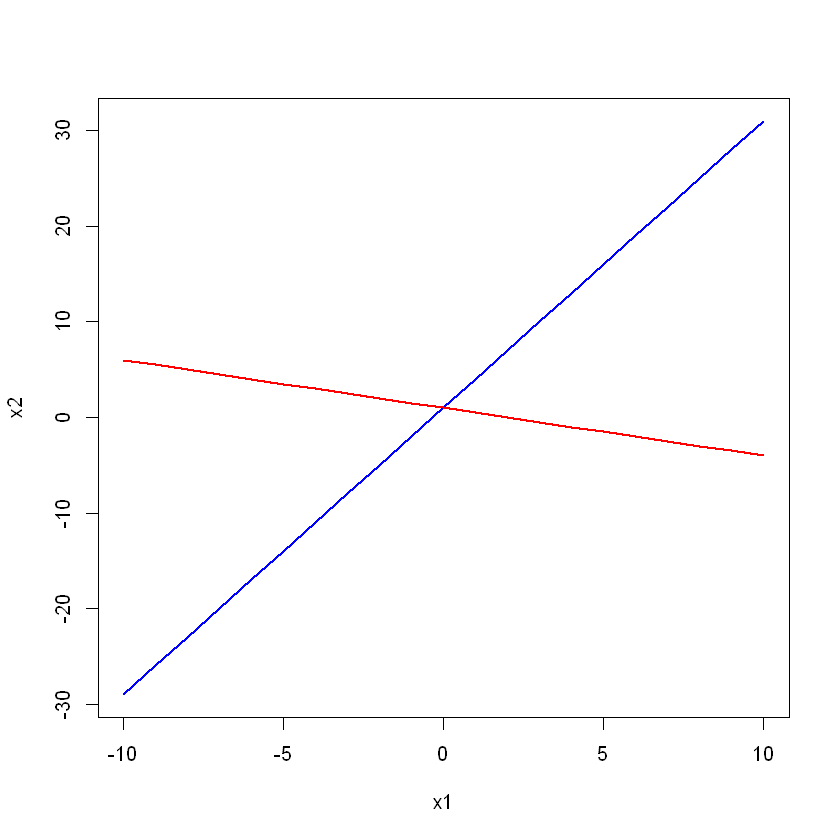

In [6]:
#a)
x1 <- c(-10:10)
x2 <- 1+3*x1
plot(x1, x2, type = "l", col = "blue", lwd=2)

#b)
lines(x1, 1-x1/2, col="red",lwd=2)


### 2 Chapter 9

We have seen that in p = 2 dimensions, a linear decision boundary
takes the form β0+β1X1+β2X2 = 0.We now investigate a non-linear
decision boundary.

(a) Sketch the curve
(1 + X1)^2 + (2 − X2)^2 = 4.

(b) On your sketch, indicate the set of points for which
(1 + X1)^2 + (2 − X2)^2 > 4,
as well as the set of points for which
(1 + X1)^2 + (2 − X2)^2 ≤ 4.

(c) Suppose that a classifier assigns an observation to the blue class
if
(1 + X1)^2 + (2 − X2)^2 > 4,
and to the red class otherwise. To what class is the observation
(0, 0) classified? (−1, 1)? (2, 2)? (3, 8)?

(d) Argue that while the decision boundary in (c) is not linear in
terms of X1 and X2, it is linear in terms of X1, X2
1 , X2, and
X2
2 .

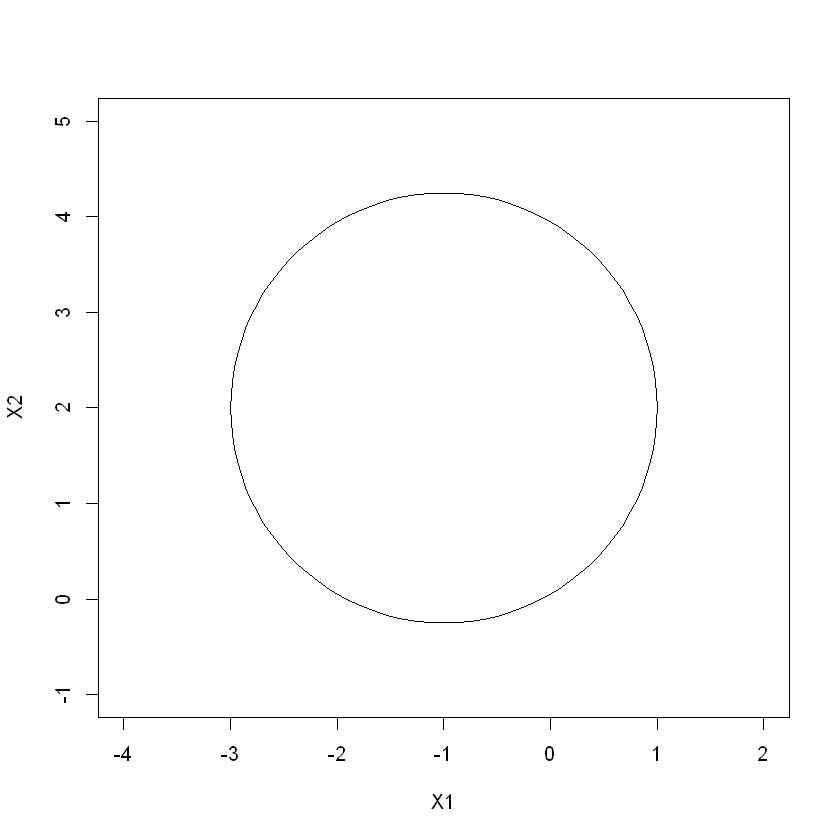

In [17]:
#a)
library(plotrix)
plot(1:5, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), xlab = "X1",ylab = "X2")
draw.circle(-1,2,2)

b) Inside the circle the values are less or equal to 4 and outside the circle the values are greater than 4.

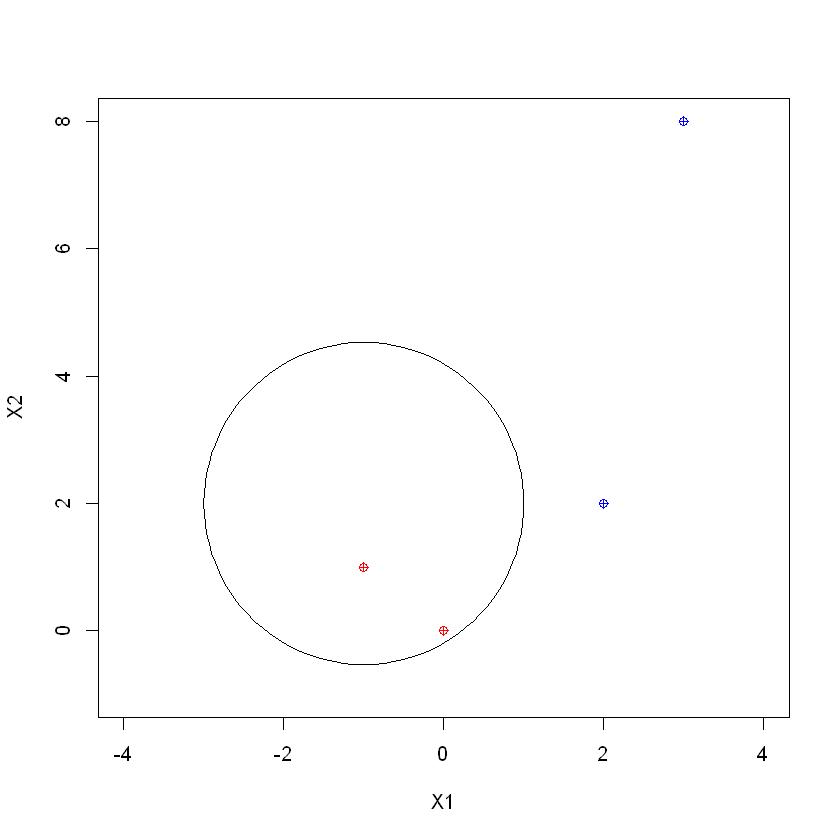

In [34]:
#c)
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), type = "p", pch=10, xlim = c(-4, 4), ylim = c(-1, 8), xlab = "X1",ylab = "X2",
    col=c("red", "red", "blue", "blue"))
draw.circle(-1,2,2)
#inside the circle the points are classified as red

### 4 Chapter 9

Generate a simulated two-class data set with 100 observations and
two features in which there is a visible but non-linear separation between
the two classes. Show that in this setting, a support vector
machine with a polynomial kernel (with degree greater than 1) or a
radial kernel will outperform a support vector classifier on the training
data. Which technique performs best on the test data? Make
plots and report training and test error rates in order to back up
your assertions.

In [105]:
set.seed(42)
x <- rnorm(100)
y <- 2+4*x^2 + rnorm(100)
train <- sample(100, 50)
y_train <- y[train]+10
y_test <- y[-train]

x_train <- x[train]
x_test <- x[-train]


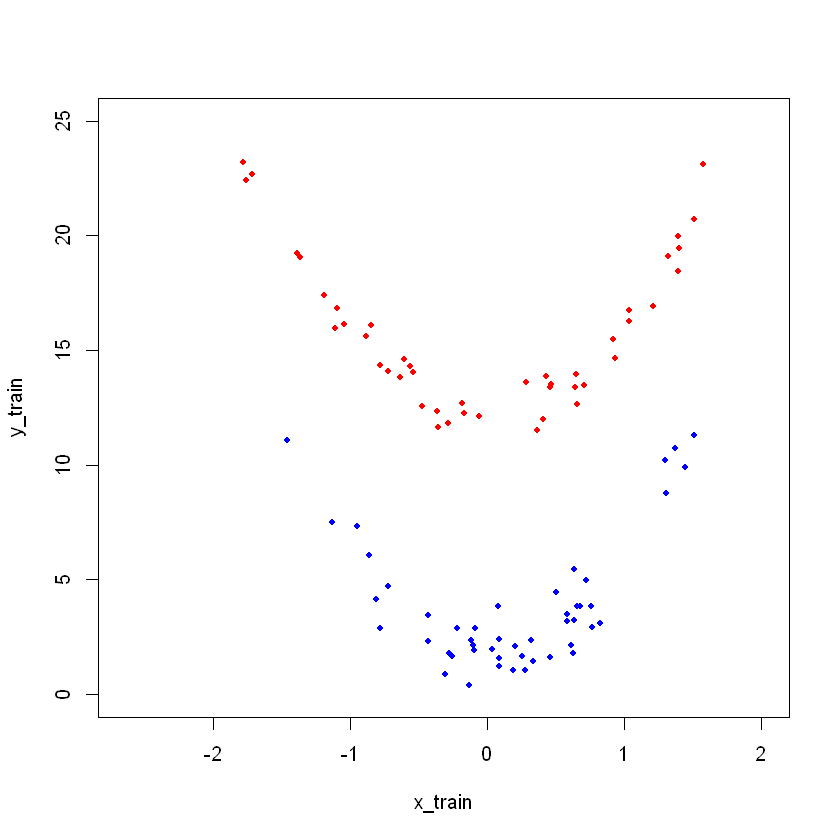

In [108]:
plot(x_train, y_train, pch=20, col="red", ylim=c(-0, 25))
points(x_test, y_test, pch=20, col="blue")

In [109]:
set.seed(42)
z <- rep(0, 100)
z[train] <- 1

train2 <- c(sample(train, 25), sample(setdiff(1:100, train), 25))
dt_train <- data.frame(x=x[train2], y=y[train2], z=as.factor(z[train2]))
dt_test <- data.frame(x=x[-train2], y=y[-train2], z=as.factor(z[-train2]))


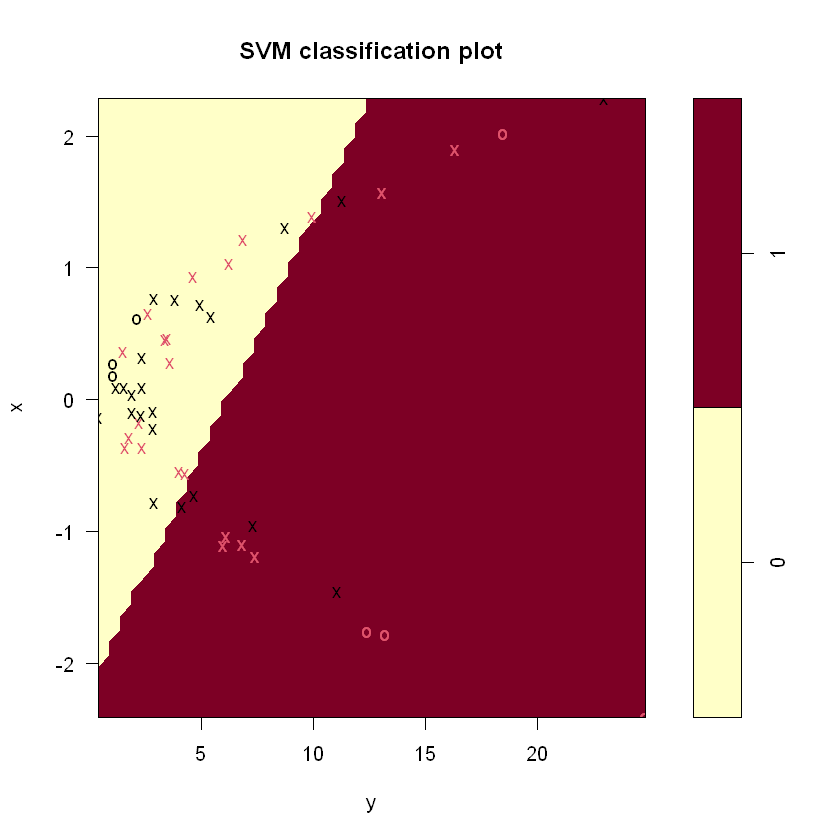

In [110]:
library(e1071)
linear <- svm(z~., data=dt_train, kernel="linear", cost=10)
plot(linear, dt_train)

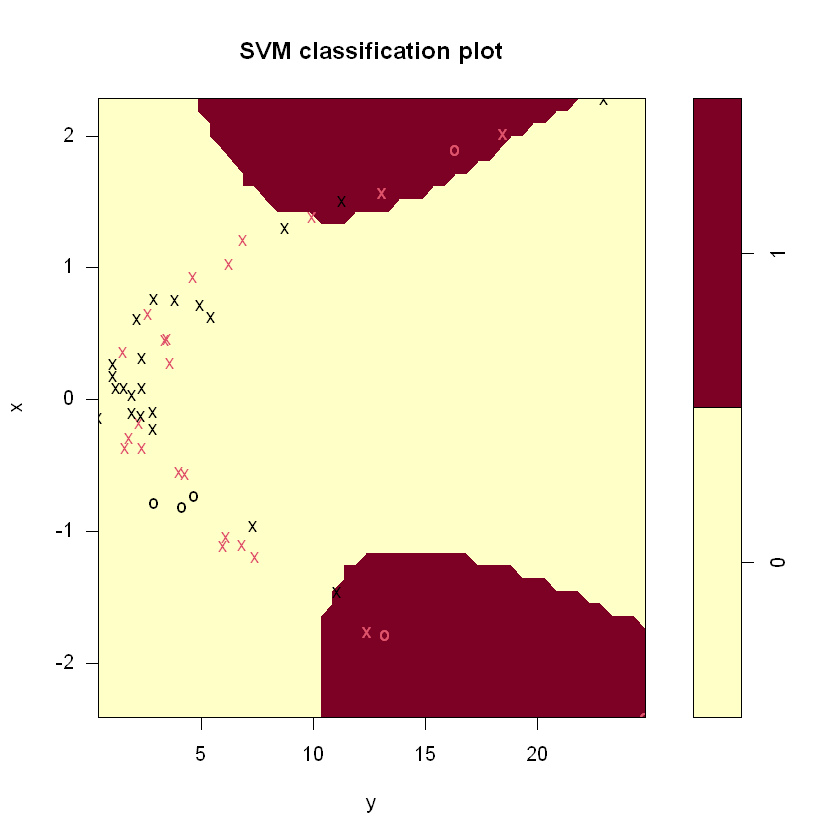

In [111]:
poly = svm(z~., data=dt_train, kernel="polynomial", cost=10)
plot(poly, dt_train)

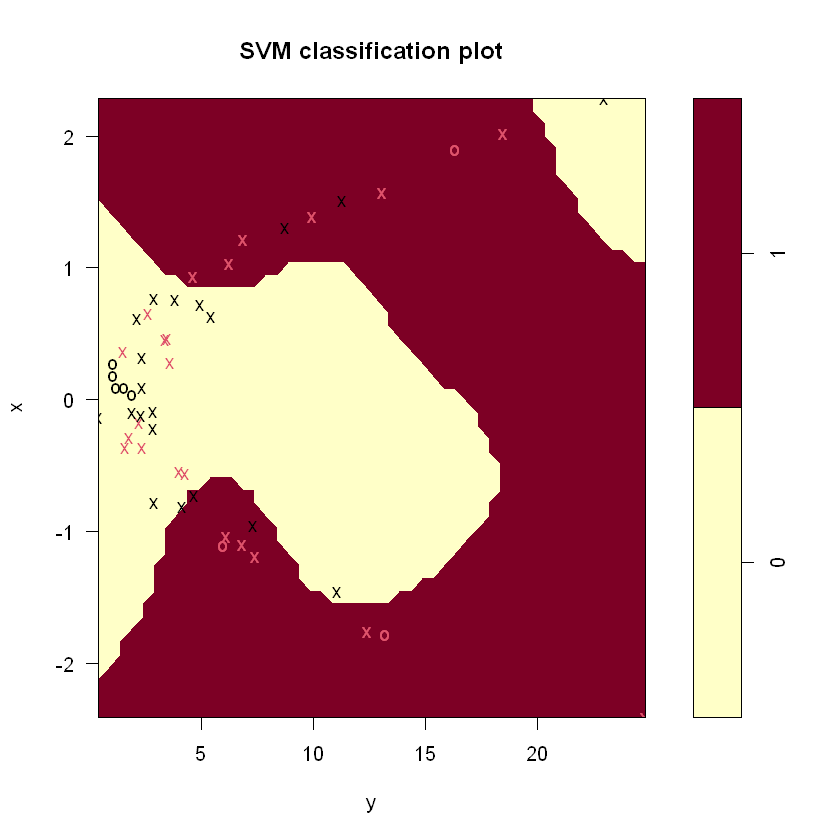

In [112]:
#set.seed()
radial = svm(z~., data=dt_train, kernel="radial", gamma=1, cost=10)
plot(radial, dt_train)

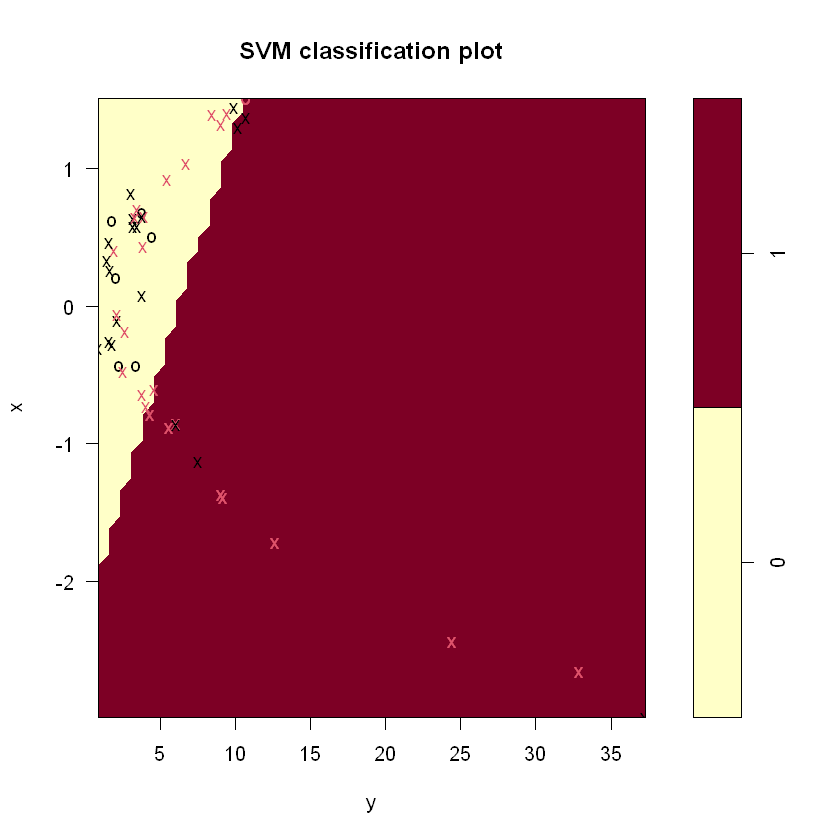

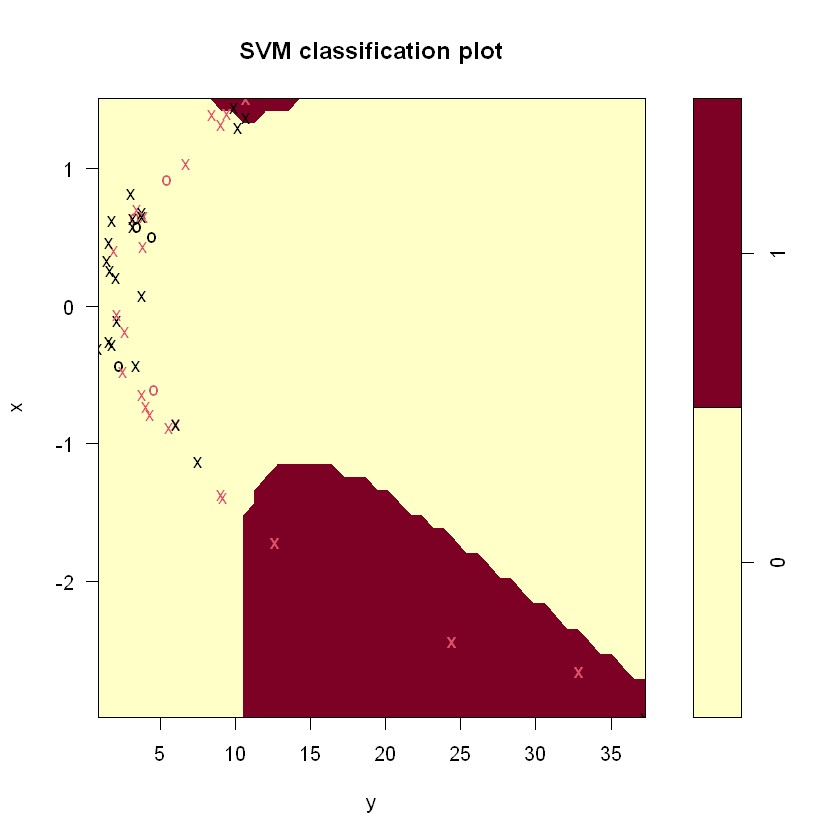

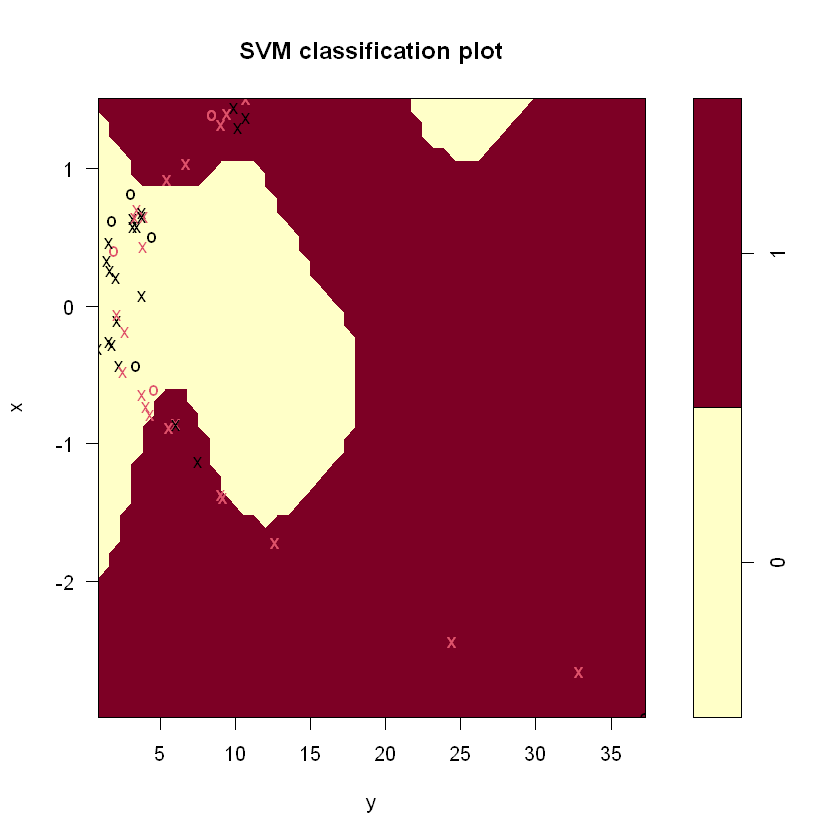

In [113]:
plot(linear, dt_test)
plot(poly, dt_test)
plot(radial, dt_test)

### 7 Chapter 9

In this problem, you will use support vector approaches in order to
predict whether a given car gets high or low gas mileage based on the
Auto data set.

(a) Create a binary variable that takes on a 1 for cars with gas
mileage above the median, and a 0 for cars with gas mileage
below the median.

(b) Fit a support vector classifier to the data with various values
of cost, in order to predict whether a car gets high or low gas
mileage. Report the cross-validation errors associated with different
values of this parameter. Comment on your results.

(c) Now repeat (b), this time using SVMs with radial and polynomial
basis kernels, with different values of gamma and degree and
cost. Comment on your results.

(d) Make some plots to back up your assertions in (b) and (c).
Hint: In the lab, we used the plot() function for svm objects
only in cases with p = 2. When p > 2, you can use the plot()
function to create plots displaying pairs of variables at a time.
Essentially, instead of typing
> plot(svmfit , dat)

where svmfit contains your fitted model and dat is a data frame
containing your data, you can type

> plot(svmfit , dat , x1∼x4)

in order to plot just the first and fourth variables. However, you
must replace x1 and x4 with the correct variable names. To find
out more, type ?plot.svm.

### 8 Chapter 9
This problem involves the OJ data set which is part of the ISLR
package.

(a) Create a training set containing a random sample of 800
observations, and a test set containing the remaining
observations.

(b) Fit a support vector classifier to the training data using
cost=0.01, with Purchase as the response and the other variables
as predictors. Use the summary() function to produce summary
statistics, and describe the results obtained.

(c) What are the training and test error rates?

(d) Use the tune() function to select an optimal cost. Consider values
in the range 0.01 to 10.

(e) Compute the training and test error rates using this new value
for cost.

(f) Repeat parts (b) through (e) using a support vector machine
with a radial kernel. Use the default value for gamma.

(g) Repeat parts (b) through (e) using a support vector machine
with a polynomial kernel. Set degree=2.

(h) Overall, which approach seems to give the best results on this
data?